In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
train = pd.read_csv('/home/james/bprRepo/button_pressing_robot/src/data/emnist-letters-train.csv', header=None)
test = pd.read_csv('/home/james/bprRepo/button_pressing_robot/src/data/emnist-letters-test.csv', header=None)

#get relevant columns
train_data = train.iloc[:, 1:]
train_labels = train.iloc[:, 0]
test_data = test.iloc[:, 1:]
test_labels = test.iloc[:, 0]

train_labels = pd.get_dummies(train_labels)
test_labels = pd.get_dummies(test_labels)

train_data = train_data.values #88800 elements
train_labels = train_labels.values
test_data = test_data.values
test_labels = test_labels.values
#del train, test


def rotate(image):
    image = image.reshape([28, 28])
    image = np.fliplr(image)
    image = np.rot90(image)
    return image.reshape([28 * 28])
train_data = np.apply_along_axis(rotate, 1, train_data)
test_data = np.apply_along_axis(rotate, 1, test_data)

train_data = tf.keras.utils.normalize(train_data, axis = 1)
test_data = tf.keras.utils.normalize(test_data, axis = 1)

IMG_SIZE = 28
train_datar = np.array(train_data).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
test_datar = np.array(test_data).reshape(-1, IMG_SIZE, IMG_SIZE, 1)



In [3]:
asdf = (train.iloc[:, 0])
print(asdf)
print(asdf.values)

0        23
1         7
2        16
3        15
4        23
         ..
88795     1
88796    21
88797     1
88798    23
88799    12
Name: 0, Length: 88800, dtype: int64
[23  7 16 ...  1 23 12]


In [4]:

model = Sequential()

model.add(Conv2D(64, (3,3), input_shape = train_datar.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(26))  #number of letters in alphabet
model.add(Activation("softmax"))

model.summary()
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics=["accuracy"])
model.fit(train_datar, train_labels, epochs=2, validation_split = 0.3)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

this 10


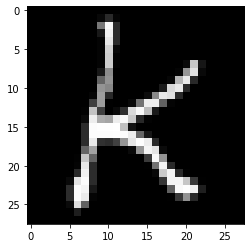

784
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.0038427  0.01976247 0.00274479 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.05489576
 0.13394565 0.02031143 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.01207707 0.12571128 0.02031143
 0.         0.         0.         0.

In [5]:
predictions = model.predict([test_datar])
print("this " + str(np.argmax(predictions[8001])))

plt.imshow(test_data[8001].reshape([28, 28]), cmap='Greys_r')
plt.show()
print(len(test_data[8001]))
print(test_data[8001])

In [6]:
#!pip install opencv-python

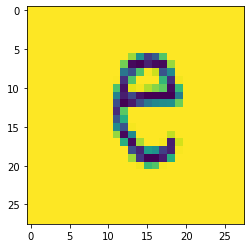

In [21]:
img = cv2.imread('/home/james/Downloads/e.png')


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.resize(gray, (28,28),interpolation = cv2.INTER_AREA)
#gray = gray - 255
plt.imshow(gray)



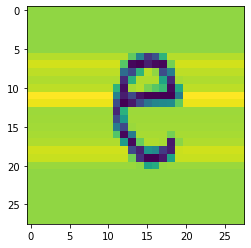

In [22]:
newimg = tf.keras.utils.normalize(gray, axis = 1)
plt.imshow(newimg)

17


TypeError: Invalid shape (0, 28, 28, 1) for image data

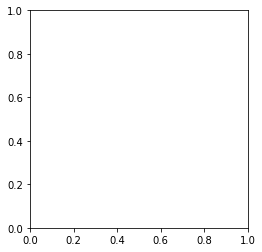

In [26]:
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
newPrediction = model.predict(newimg)
print(np.argmax(newPrediction))
